In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture du fichier de données

In [3]:
product_transaction_customer = pd.read_csv('product_transaction_customer.csv')

In [3]:
product_transaction_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657512 entries, 0 to 657511
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     657512 non-null  object 
 1   date        657512 non-null  object 
 2   session_id  657512 non-null  object 
 3   client_id   657512 non-null  object 
 4   price       657512 non-null  float64
 5   categ       657512 non-null  float64
 6   StartDate   657512 non-null  object 
 7   sex         657512 non-null  object 
 8   birth       657512 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 45.1+ MB


In [4]:
product_transaction_customer.head()

,id_prod,date,session_id,client_id,price,categ,StartDate,sex,birth
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,2022-05,f,1986
1,0_1627,2022-06-18,s_225494,c_103,3.99,0.0,2022-06,f,1986
2,0_1104,2023-02-08,s_338755,c_103,13.21,0.0,2023-02,f,1986
3,0_1390,2021-04-20,s_23078,c_103,19.37,0.0,2021-04,f,1986
4,0_1547,2022-03-15,s_179629,c_103,8.99,0.0,2022-03,f,1986


In [5]:
product_transaction_customer.price.describe(include='all')

count    657512.000000
mean         17.540258
std          18.340492
min           0.620000
25%           8.990000
50%          13.990000
75%          19.080000
max         300.000000
Name: price, dtype: float64

Calcul de la moyenne, la variance, la median pour toutes les categories

In [6]:
for cat in product_transaction_customer["categ"].unique():
    subset = product_transaction_customer['price']
    print("-"*20)
    print(cat)
    print("moy:\n",product_transaction_customer['price'].mean())
    print("med:\n",product_transaction_customer['price'].median())
    print("mod:\n",product_transaction_customer['price'].mode())
    print("var:\n",product_transaction_customer['price'].var(ddof=0))
    print("ect:\n",product_transaction_customer['price'].std(ddof=0))

--------------------
0.0
moy:
 17.540257729225697
med:
 13.99
mod:
 0    15.99
dtype: float64
var:
 336.3731469942944
ect:
 18.340478374194454
--------------------
1.0
moy:
 17.540257729225697
med:
 13.99
mod:
 0    15.99
dtype: float64
var:
 336.3731469942944
ect:
 18.340478374194454
--------------------
2.0
moy:
 17.540257729225697
med:
 13.99
mod:
 0    15.99
dtype: float64
var:
 336.3731469942944
ect:
 18.340478374194454


1. Les indicateurs autour du CA

    Le chiffre d'affaire par categorie

In [7]:
groupbycateg = product_transaction_customer.groupby('categ',as_index=False).sum()

In [8]:
groupbycateg

,categ,price,birth
0,0.0,4.220480e+06,784705241
1,1.0,4.619960e+06,445221766
2,2.0,2.692489e+06,70484821


Representation graphique du chiffre 

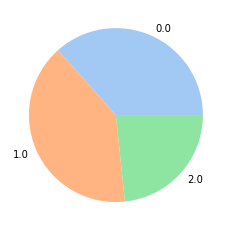

In [9]:
# La palette de couleur Seaborn pour pie chart
colors = sns.color_palette('pastel')
# creation du graphe
plt.pie(groupbycateg.price, labels=groupbycateg.categ, colors=colors)
plt.show()

    Le chiffre d'affaire par sexe

In [10]:
groupbysexe = product_transaction_customer.groupby('sex',as_index=False).sum()

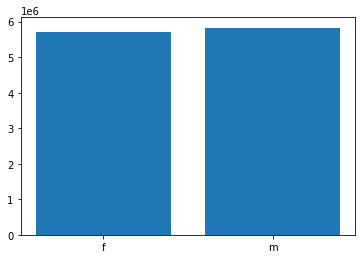

In [11]:
# Create bars
plt.bar(groupbysexe.sex, groupbysexe.price)
# Show graphic
plt.show()

    Le chiffre d'affaire par sexe et par categorie

In [12]:
groupbysexcateg = product_transaction_customer.groupby(['sex','categ'],as_index=False).sum()
groupbysexcateg

,sex,categ,price,birth
0,f,0.0,2.093117e+06,389587281
1,f,1.0,2.341981e+06,225166656
2,f,2.0,1.269296e+06,33367431
3,m,0.0,2.127363e+06,395117960
4,m,1.0,2.277979e+06,220055110
5,m,2.0,1.423193e+06,37117390


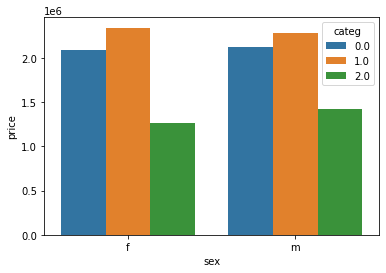

In [13]:
fig, ax = plt.subplots()

sns.barplot(ax = ax, data = groupbysexcateg, x = 'sex', y = 'price', hue = 'categ')

plt.show()

La representation du CA dans le temps

In [14]:
groupDateCategPrice = product_transaction_customer.groupby(['StartDate'])['price'].sum().reset_index()
groupDateCategPrice

,StartDate,price
0,2021-03,482440.61
1,2021-04,476109.30
2,2021-05,492943.47
3,2021-06,484088.56
4,2021-07,482835.40
5,2021-08,482284.79
6,2021-09,507240.68
7,2021-11,516167.73
8,2021-12,525917.28
9,2022-01,525338.99


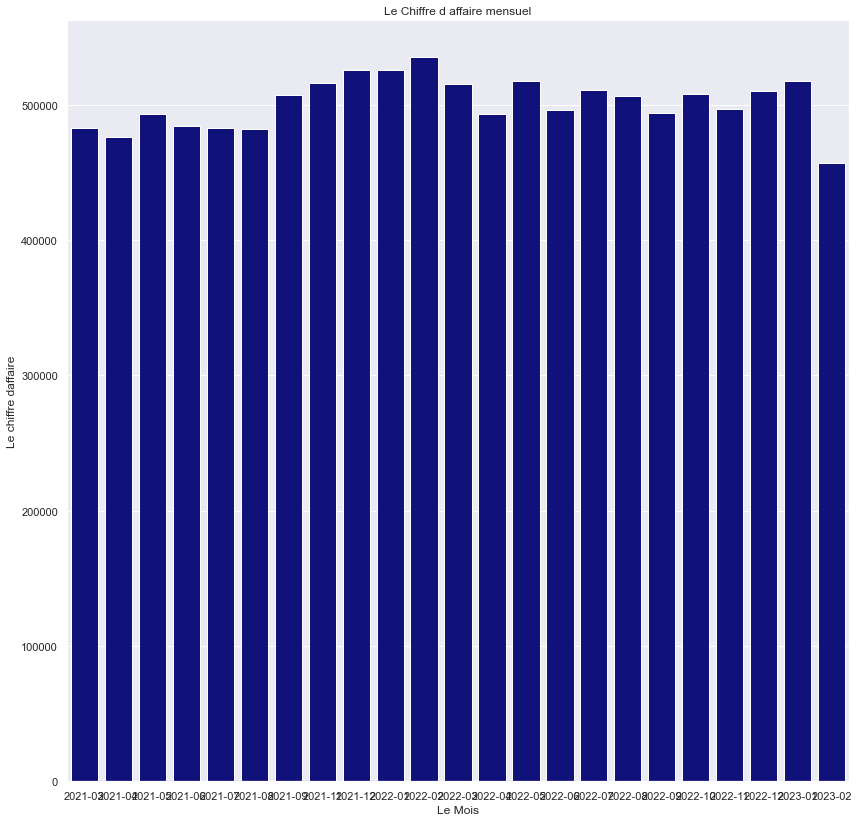

In [16]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 14))
plt.title('Le Chiffre d ''affaire mensuel')
plt.xlabel('Le Mois')
plt.ylabel('Le chiffre d''affaire')
sns.barplot(x="StartDate",  y="price", data=groupDateCategPrice, color='darkblue')
plt.xlabel('Le Mois')
plt.ylabel('Le chiffre d''affaire')
plt.show()


In [20]:
categ = product_transaction_customer.groupby(['StartDate','categ'])['price'].sum().reset_index()
categ

,StartDate,categ,price
0,2021-03,0.0,193629.17
1,2021-03,1.0,186974.17
2,2021-03,2.0,101837.27
3,2021-04,0.0,205222.46
4,2021-04,1.0,156138.35
...,...,...,...
64,2023-01,1.0,210104.41
65,2023-01,2.0,126153.08
66,2023-02,0.0,162457.00
67,2023-02,1.0,180347.24


In [21]:
dataCate0 = categ.loc[categ['categ']==0.0]
dataCate1 = categ.loc[categ['categ']==1.0]
dataCate2 = categ.loc[categ['categ']==2.0]


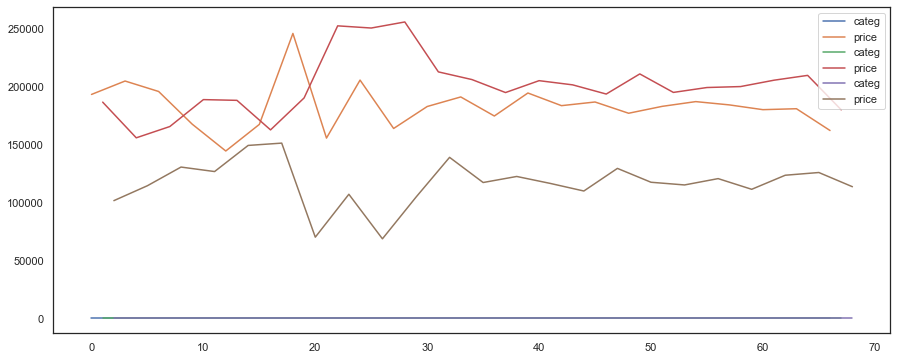

In [30]:
ax = dataCate0.plot(figsize=(15, 6))
ax1 = dataCate1.plot(ax=ax, figsize=(15, 6))
dataCate2.plot(ax=ax1, figsize=(15, 6))
plt.show()

In [31]:
product_transaction_customer.date = pd.to_datetime(product_transaction_customer.date)

In [32]:
Monthly_summary = product_transaction_customer.groupby(['categ','date']).resample('MS', on='date').mean()
Monthly_summary

price  categ        birth
categ date       date                                     
0.0   2021-03-01 2021-03-01  10.779088    0.0  1977.931153
      2021-03-02 2021-03-01  10.835919    0.0  1978.188710
      2021-03-03 2021-03-01  10.357073    0.0  1977.818951
      2021-03-04 2021-03-01  10.464440    0.0  1977.287744
      2021-03-05 2021-03-01  10.652353    0.0  1978.554367
...                                ...    ...          ...
2.0   2023-02-24 2023-02-01  75.295745    2.0  1995.425532
      2023-02-25 2023-02-01  60.172826    2.0  1994.869565
      2023-02-26 2023-02-01  71.183585    2.0  1994.679245
      2023-02-27 2023-02-01  70.288267    2.0  1997.666667
      2023-02-28 2023-02-01  79.540800    2.0  1997.920000

[2097 rows x 3 columns]

In [33]:
pp = product_transaction_customer.groupby(['date','categ'])['price'].sum().reset_index()

In [34]:
Monthly_summar = pp.groupby(['categ'],as_index= False).resample('MS', on='date').mean().reset_index()
Monthly_summar

,level_0,date,categ,price
0,0,2021-03-01,0.0,6246.102258
1,0,2021-04-01,0.0,6840.748667
2,0,2021-05-01,0.0,6328.603871
3,0,2021-06-01,0.0,5598.105000
4,0,2021-07-01,0.0,4669.380323
...,...,...,...,...
67,2,2022-10-01,2.0,3899.320645
68,2,2022-11-01,2.0,3721.420000
69,2,2022-12-01,2.0,3993.648065
70,2,2023-01-01,2.0,4069.454194


La moyenne mobile

In [35]:
y0 = Monthly_summar.loc[Monthly_summar['categ']==0.0]
y1 = Monthly_summar.loc[Monthly_summar['categ']==1.0]
y2 = Monthly_summar.loc[Monthly_summar['categ']==2.0]

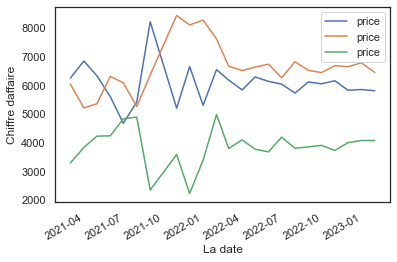

In [36]:
ax = y0.plot(x='date', y='price')
ax1 = y1.plot(ax=ax, x='date', y='price')
y2.plot(ax=ax1, x='date', y='price')
plt.xlabel('La date')
plt.ylabel('Chiffre d''affaire')
plt.show()

Les tops et les flops

    Ajout de la colonne Age

In [5]:
product_transaction_customer['age'] = 2022 - product_transaction_customer['birth']
product_transaction_customer

,id_prod,date,session_id,client_id,price,categ,StartDate,sex,birth,age
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,2022-05,f,1986,36
1,0_1627,2022-06-18,s_225494,c_103,3.99,0.0,2022-06,f,1986,36
2,0_1104,2023-02-08,s_338755,c_103,13.21,0.0,2023-02,f,1986,36
3,0_1390,2021-04-20,s_23078,c_103,19.37,0.0,2021-04,f,1986,36
4,0_1547,2022-03-15,s_179629,c_103,8.99,0.0,2022-03,f,1986,36
...,...,...,...,...,...,...,...,...,...,...
657507,0_1509,2021-05-15,s_34762,c_8114,4.99,0.0,2021-05,m,1962,60
657508,1_152,2021-11-08,s_116675,c_240,11.06,1.0,2021-11,m,1998,24
657509,2_207,2021-06-01,s_42418,c_305,50.99,2.0,2021-06,f,1996,26
657510,1_521,2022-10-18,s_284060,c_305,22.99,1.0,2022-10,f,1996,26


    Les tops references

In [38]:
product_transaction_customer.nlargest(3, ['categ', 'price'])

,id_prod,date,session_id,client_id,price,categ,StartDate,sex,birth,age
13269,2_2,2022-12-07,s_308301,c_4958,300.0,2.0,2022-12,m,1999,23
14320,2_2,2021-12-07,s_130658,c_4958,300.0,2.0,2021-12,m,1999,23
15549,2_2,2022-06-07,s_220074,c_4958,300.0,2.0,2022-06,m,1999,23


In [39]:
product_transaction_customer.nsmallest(3, ['categ', 'price'])

,id_prod,date,session_id,client_id,price,categ,StartDate,sex,birth,age
21465,0_202,2021-03-05,s_2176,c_5277,0.62,0.0,2021-03,m,1976,46
39389,0_528,2021-05-28,s_40833,c_1609,0.62,0.0,2021-05,m,1980,42
84228,0_528,2021-06-24,s_53240,c_5636,0.62,0.0,2021-06,f,1989,33


In [18]:
cacateg = product_transaction_customer.groupby(['id_prod','categ'])['price'].sum().reset_index()
cacateg

,id_prod,categ,price
0,0_0,0.0,4477.50
1,0_1,0.0,5154.31
2,0_10,0.0,323.10
3,0_100,0.0,61.80
4,0_1000,0.0,2790.72
...,...,...,...
3258,2_95,2.0,395.96
3259,2_96,2.0,27835.71
3260,2_97,2.0,2092.87
3261,2_98,2.0,149.74


In [41]:
df_sorted = cacateg.groupby(['categ']).apply(lambda x: x.nsmallest(n=3, columns='price')).reset_index(drop=True)

In [42]:
df_sorted

,id_prod,categ,price
0,0_1539,0.0,0.99
1,0_898,0.0,1.27
2,0_1284,0.0,1.38
3,1_420,1.0,14.24
4,1_224,1.0,19.80
5,1_470,1.0,21.64
6,2_81,2.0,86.99
7,2_23,2.0,115.99
8,2_98,2.0,149.74


In [19]:
df_sorted_top = cacateg.groupby(['categ']).apply(lambda x: x.nlargest(n=3, columns='price')).reset_index(drop=True)
df_sorted_top

,id_prod,categ,price
0,0_1441,0.0,22389.21
1,0_1421,0.0,21809.09
2,0_1414,0.0,21395.52
3,1_395,1.0,53950.39
4,1_369,1.0,53665.63
5,1_414,1.0,51615.78
6,2_159,2.0,92265.68
7,2_135,2.0,67403.23
8,2_112,2.0,62840.10


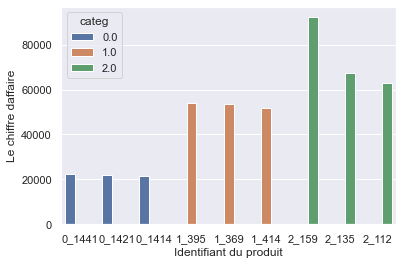

In [24]:
fig, ax = plt.subplots()

sns.barplot(ax = ax, data = df_sorted_top, x = 'id_prod', y = 'price', hue = 'categ')
plt.xlabel('Identifiant du produit')
plt.ylabel('Le chiffre d''affaire')
plt.show()


La repartition du chiffre d'affaire entre les clients

In [45]:
ca_client = product_transaction_customer.groupby(['client_id'])['price'].sum().reset_index()
ca_client

,client_id,price
0,c_1,550.19
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2209.92
4,c_1001,1720.08
...,...,...
8593,c_995,189.41
8594,c_996,1611.59
8595,c_997,1432.02
8596,c_998,2779.88


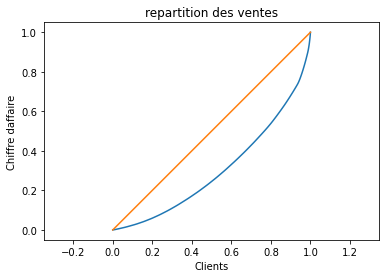

In [225]:
# Btoc = product_transaction_customer.loc[product_transaction_customer['price'] <= 13.99]
testlorenz = product_transaction_customer['price'].values
n = len(testlorenz)
lorenz = np.cumsum(np.sort(testlorenz)) / testlorenz.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
# plt.grid(True,linestyle+"--")
plt.title('repartition des ventes')
plt.xlabel('Clients')
plt.ylabel('Chiffre d''affaire')
plt.plot([0,1],[0,1])
plt.show()

# Le lien entre le genre d’un client et les catégories des livres achetés

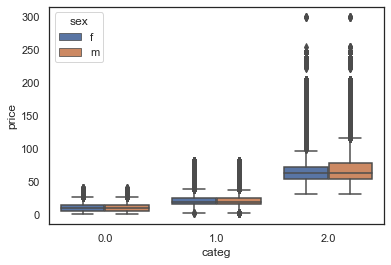

In [47]:
sns.boxplot(x= product_transaction_customer.categ, y=product_transaction_customer.price, hue=product_transaction_customer.sex, data=product_transaction_customer)

plt.show()

## Le test statistique associé

### Le test de chi2

#### Tableau de contengence

In [32]:
X = "sex"
Y = "categ"
cont = product_transaction_customer[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="CA")
cont

categ,0.0,1.0,2.0,CA
sex,,,,
f,196986,114087,16722,327795
m,199711,111416,18590,329717
CA,396697,225503,35312,657512


#### Calcul de la P-Value

In [33]:
from scipy.stats import chi2_contingency
st_chi2, st_p, st_dof, st_exp = chi2_contingency(cont)
print('le coeeficient de correlation ',st_p)

le coeeficient de correlation  1.7797545892014317e-28


# Conclusion
    Hypothese: Est ce qu'il y a un lien entre l'âge et la categorie des livres achetés
    
    Le P_value etant inferieur à 0.05, cette hypothese n'est pas valide 

# Le lien entre l’âge des clients et le montant total des achats

In [6]:
customer_Age_montant = product_transaction_customer.groupby('age')['price'].sum().reset_index()
customer_Age_montant

,age,price
0,18,591414.23
1,19,172831.75
2,20,178767.19
3,21,174347.66
4,22,160555.21
...,...,...
71,89,5078.98
72,90,4803.64
73,91,2691.19
74,92,3959.24


## La creation de la tranche d'âge pour une bonne representation sur le boxplot

In [7]:
bins = [0,18,28,38,48,58,68,78,88,93]
customer_Age_montant['tranche'] = pd.cut(customer_Age_montant['age'], bins=bins)

In [8]:
customer_Age_montant_tranche = customer_Age_montant.groupby('tranche',as_index=False)['price'].sum()
customer_Age_montant_tranche

,tranche,price
0,"(0, 18]",591414.23
1,"(18, 28]",2213065.27
2,"(28, 38]",2376055.65
3,"(38, 48]",2964660.81
4,"(48, 58]",1803323.22
5,"(58, 68]",945483.73
6,"(68, 78]",428241.44
7,"(78, 88]",190955.46
8,"(88, 93]",19730.13


## Un hystogramme qui represente le montant total des achats par tranche d'âge client

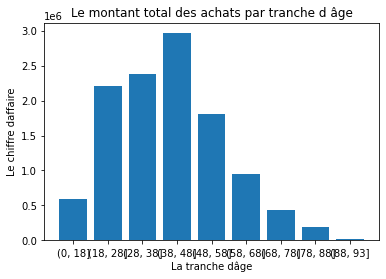

In [9]:
y = np.arange(len(customer_Age_montant_tranche.tranche))
plt.bar(y,customer_Age_montant_tranche.price)
plt.xticks(y,customer_Age_montant_tranche.tranche)
plt.xlabel('La tranche d''âge')
plt.ylabel('Le chiffre d''affaire')
plt.title('Le montant total des achats par tranche d ''âge')
plt.show()

## Le test statistique de verification de l'hypothese

### Test de Pearsonr entre l'âge et le montant total des achats

In [11]:
from scipy.stats import pearsonr
list1 = product_transaction_customer['age'] 
list2 = product_transaction_customer['price'] 
  
corr, _ = pearsonr(list1, list2) 
index=['pearson_coeff','p_value']
columns=['resultat_test']

print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.209


# Conclusion

    Hypothese: Est ce qu'il y a un lien entre l'âge des clients et le montant total des achats

    Le P_value etant superieur à 0.05, cette hypothese est valide, il n'y a pas de correlation entre l'âge des clients     et le montant total des achats
    

# La Frequence d'achat

In [12]:
frequence_achat = product_transaction_customer.groupby('client_id',as_index=False)['session_id'].count()
frequence_achat

,client_id,session_id
0,c_1,38
1,c_10,58
2,c_100,8
3,c_1000,122
4,c_1001,96
...,...,...
8593,c_995,14
8594,c_996,94
8595,c_997,58
8596,c_998,53


# La taille du panier moyen et les catégories des livres achetés

In [7]:
panierMoyen = product_transaction_customer.groupby('categ',as_index=False)['price'].mean()
panierMoyen

,categ,price
0,0.0,10.639052
1,1.0,20.487357
2,2.0,76.248568


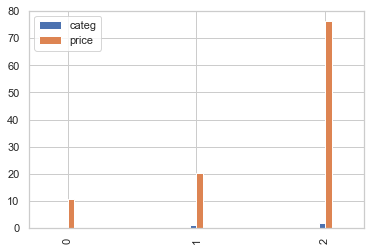

In [392]:
panierMoyen.plot(kind='bar',width=0.1)
plt.show()


## Les test de correlation

### Test de Pearsonr entre la categorie et le prix

In [19]:
list1 = product_transaction_customer['categ'] 
list2 = product_transaction_customer['price'] 
  
corr, _ = pearsonr(list1, list2) 
index=['pearson_coeff','p_value']
columns=['resultat_test']

print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.670


# Conclusion
    Hypothese: Est ce qu'il y a un lien entre les categories de livres achetés et la taille du panier moyen
    
    Le P_value etant superieur à 0.05, cette hypothese est valide, il y a une correlation entre le panier moyen et les categories de livres achetés 